<a href="https://colab.research.google.com/github/LuisaPolicarpo/Project5/blob/main/Duvidas_FC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import pandas as pd

In [42]:
link = 'https://raw.githubusercontent.com/LuisaPolicarpo/Project5/main/final_date.csv'
df = pd.read_csv(link)

In [ ]:
df=df.iloc[:36] #filter the data until end of 2019
df

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      36 non-null     object
 1   Earnings  36 non-null     int64 
 2   sleeps    36 non-null     int64 
 3   Guests    36 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.2+ KB


In [44]:
df['Date'] = pd.to_datetime(df['Date'])

In [45]:
df.set_index('Date', inplace=True)

In [46]:
test_size_percentage = 0.25 #9 months (from April to December 2019)
test_size = int(test_size_percentage * df.shape[0]) #9
train_size_initial = df.shape[0] - test_size #27

train_set = df['sleeps'].iloc[:train_size_initial] #1st 27 months
test_set = df['sleeps'].iloc[train_size_initial:] #last 9 months of 2019

In [47]:
# len check
print(train_set.shape[0] + test_set.shape[0] == df.shape[0])

True


In [48]:
!pip install pmdarima
from pmdarima.arima import auto_arima

auto_arima(train_set)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


ARIMA(order=(3, 0, 2), scoring_args={}, suppress_warnings=True)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

def arima_forecast(tme_sries):
  arima = ARIMA(tme_sries, order=(3, 0, 2)).fit()  #I obtained the values order() in auto_arima
  return arima.forecast().iloc[0]

evaluation_df = pd.DataFrame(range(0, test_size), columns = ['forecast'])
evaluation_df['test'] = list(test_set)
evaluation_df['forecast'] = evaluation_df['forecast']\
  .apply(lambda n: arima_forecast(df['sleeps'].iloc[:train_size_initial + n]))

In [ ]:
df['sleeps'].plot()
evaluation_df.set_index(test_set.index)['forecast'].iloc[evaluation_df.shape[0] -12:].plot() #DOUBT: dates dont make sense. The range neither.

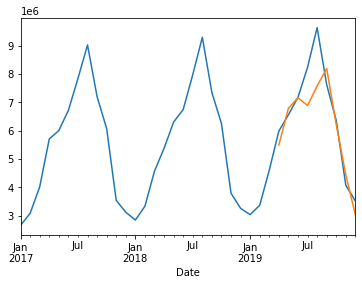

In [36]:
df['sleeps'].plot()
#test_set.plot()
evaluation_df.set_index(test_set.index)['forecast'].plot() #DOUBT: The graph doesnt makes sense.. should not exist data after 01/12/2019

In [50]:
#EXPONENTIAL SMOOTHING
from statsmodels.tsa.api import ExponentialSmoothing
def expsm_forecast(tme_sries):
  es = ExponentialSmoothing(tme_sries).fit(smoothing_level=0.1)
  return es.forecast().iloc[0]

evaluation_df = pd.DataFrame(range(0, test_size), columns = ['forecast'])
evaluation_df['test'] = list(test_set)
evaluation_df['forecast'] = evaluation_df['forecast']\
  .apply(lambda n: expsm_forecast(df['sleeps'].iloc[:train_size_initial + n]))

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dat

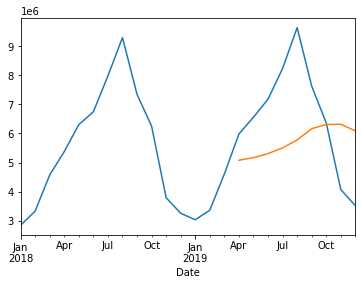

In [51]:
df['sleeps'].iloc[df.shape[0] - 60:].plot() #DOUBT: which interval should I put here? The values are so different
evaluation_df.set_index(test_set.index)['forecast'].iloc[evaluation_df.shape[0] - 60:].plot()

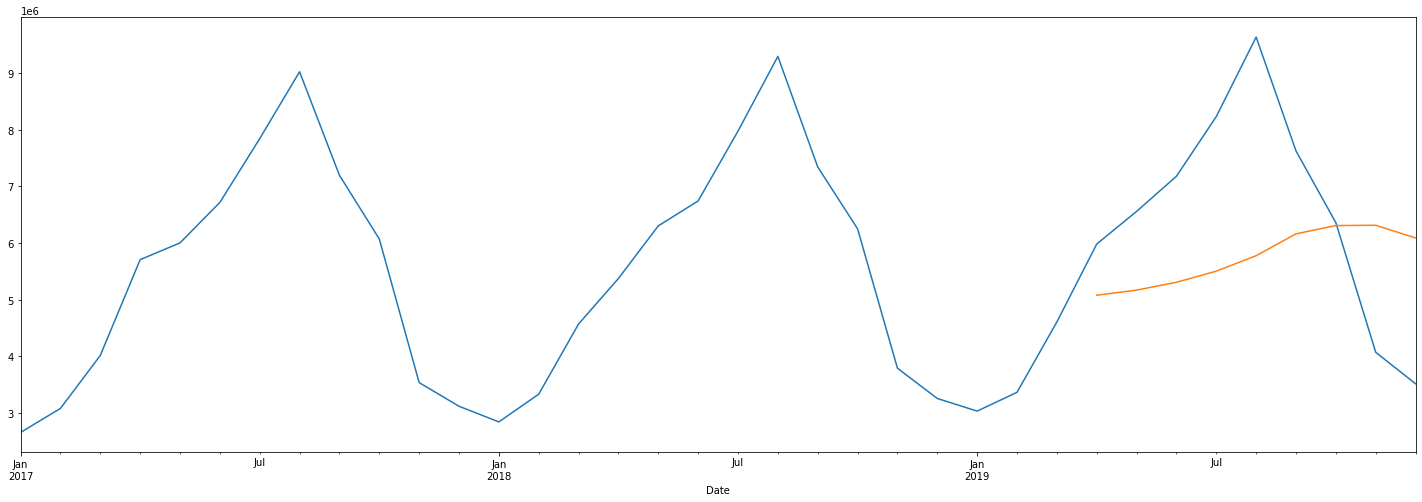

In [80]:
df['sleeps'].plot() #DOUBT: which interval should I put here? The values are so different
evaluation_df.set_index(test_set.index)['forecast'].plot()

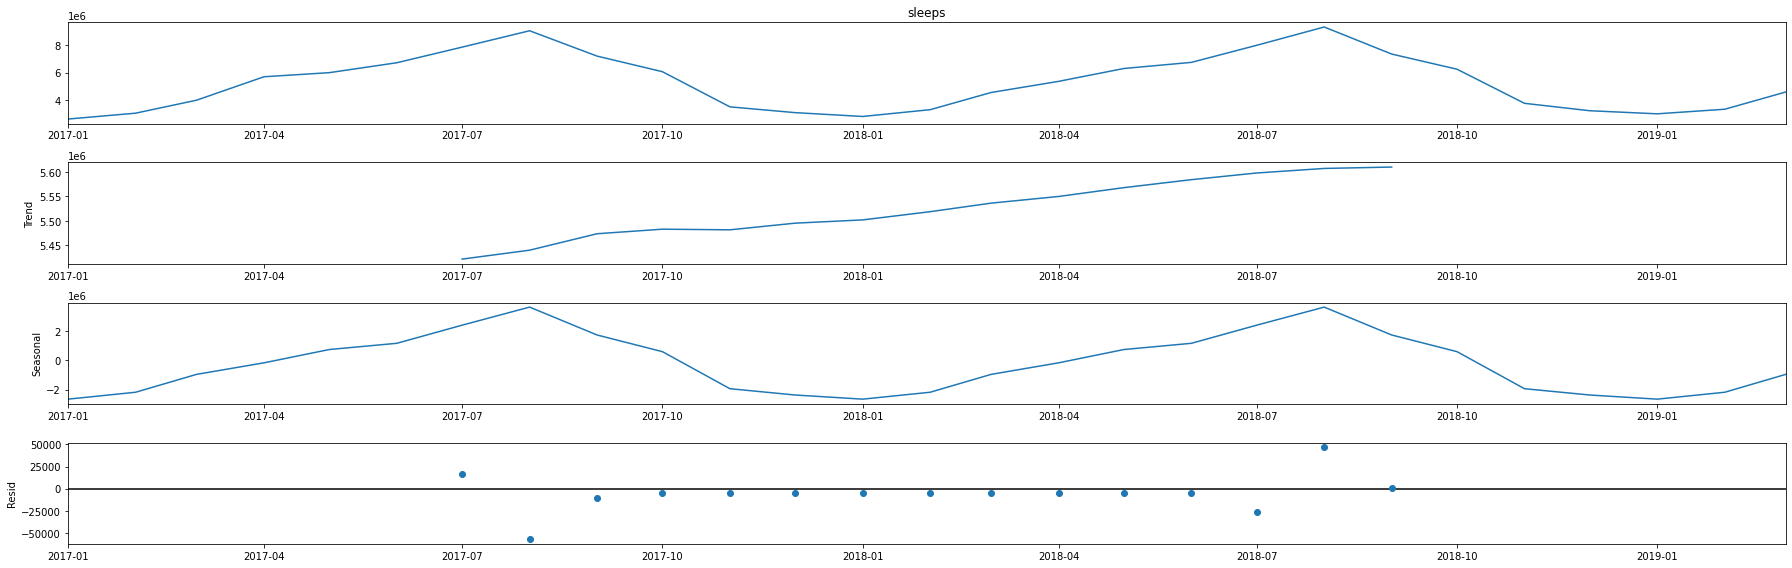

In [53]:
import statsmodels.api as sm
from pylab import rcParams
import matplotlib.pyplot as plt
rcParams['figure.figsize'] = 25, 8

#decomposition = sm.tsa.seasonal_decompose(x = train_set.rolling(12).mean().dropna(), period = 12, model='additive') #Note: using rolling window
decomposition = sm.tsa.seasonal_decompose(x = train_set, period = 12, model='additive')
fig = decomposition.plot()
plt.show()

# sig = furniture['Sales'].resample('W').sum()
# decomposition = sm.tsa.seasonal_decompose(x = furniture['Sales'].rolling(30).mean().dropna(), freq = 12, model='additive')

In [54]:
decomposition.trend

Date
2017-01-01             NaN
2017-02-01             NaN
2017-03-01             NaN
2017-04-01             NaN
2017-05-01             NaN
2017-06-01             NaN
2017-07-01    5.421557e+06
2017-08-01    5.439788e+06
2017-09-01    5.473412e+06
2017-10-01    5.482738e+06
2017-11-01    5.481427e+06
2017-12-01    5.495047e+06
2018-01-01    5.501701e+06
2018-02-01    5.518532e+06
2018-03-01    5.535991e+06
2018-04-01    5.549627e+06
2018-05-01    5.567687e+06
2018-06-01    5.583990e+06
2018-07-01    5.597644e+06
2018-08-01    5.606941e+06
2018-09-01    5.609790e+06
2018-10-01             NaN
2018-11-01             NaN
2018-12-01             NaN
2019-01-01             NaN
2019-02-01             NaN
2019-03-01             NaN
Name: trend, dtype: float64

In [55]:
type(decomposition.trend)

pandas.core.series.Series

In [56]:
df_trend=decomposition.trend.to_frame()
df_trend.reset_index(inplace=True) #passa a data para string

In [57]:
df_trend['Date']=pd.to_datetime(df_trend['Date'])

In [58]:
df_trend.dropna(inplace=True)

In [59]:
df_trend.reset_index(inplace=True)

In [60]:
df_trend.set_index('Date', inplace=True)

In [62]:
df_trend

,index,trend
Date,,
2017-07-01,6,5.421557e+06
2017-08-01,7,5.439788e+06
2017-09-01,8,5.473412e+06
2017-10-01,9,5.482738e+06
2017-11-01,10,5.481427e+06
2017-12-01,11,5.495047e+06
2018-01-01,12,5.501701e+06
2018-02-01,13,5.518532e+06
2018-03-01,14,5.535991e+06


In [69]:
test_set

Date
2019-04-01    5981300
2019-05-01    6557840
2019-06-01    7177554
2019-07-01    8231230
2019-08-01    9633427
2019-09-01    7624574
2019-10-01    6358685
2019-11-01    4071968
2019-12-01    3515940
Name: sleeps, dtype: int64

In [131]:
df_test_set=test_set.to_frame()

In [133]:
df_test_set

,sleeps
Date,
2019-04-01,5981300
2019-05-01,6557840
2019-06-01,7177554
2019-07-01,8231230
2019-08-01,9633427
2019-09-01,7624574
2019-10-01,6358685
2019-11-01,4071968
2019-12-01,3515940


In [127]:
df_trend.insert(0, 'ID_trend', range(0, len(df_trend)))

,ID,index,trend
Date,,,
2017-07-01,0,6,5.421557e+06
2017-08-01,1,7,5.439788e+06
2017-09-01,2,8,5.473412e+06
2017-10-01,3,9,5.482738e+06
2017-11-01,4,10,5.481427e+06
2017-12-01,5,11,5.495047e+06
2018-01-01,6,12,5.501701e+06
2018-02-01,7,13,5.518532e+06
2018-03-01,8,14,5.535991e+06


In [137]:
len(df_test_set)

9

In [138]:
df_test_set.insert(0, 'ID_test', range(15, 15+len(df_test_set)))

In [142]:
df_test_set

,ID_test,sleeps
Date,,
2019-04-01,15,5981300
2019-05-01,16,6557840
2019-06-01,17,7177554
2019-07-01,18,8231230
2019-08-01,19,9633427
2019-09-01,20,7624574
2019-10-01,21,6358685
2019-11-01,22,4071968
2019-12-01,23,3515940


In [143]:
from sklearn.linear_model import LinearRegression
X = df_trend[['ID']]
y = df_trend['trend']

modelLR2 = LinearRegression().fit(X, y)

#df_trend['predict']=modelLR2.predict(df_trend['level_0'])

X1 = df_test_set[['ID_test']]
y_pred = pd.Series(modelLR2.predict(X1), index=X1.index)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- ID_test
Feature names seen at fit time, yet now missing:
- ID

  warnings.warn(message, FutureWarning)


In [144]:
y_pred

Date
2019-04-01    5.631504e+06
2019-05-01    5.644893e+06
2019-06-01    5.658282e+06
2019-07-01    5.671671e+06
2019-08-01    5.685061e+06
2019-09-01    5.698450e+06
2019-10-01    5.711839e+06
2019-11-01    5.725228e+06
2019-12-01    5.738617e+06
dtype: float64

In [81]:
#Residuals description
decomposition.resid.describe()
decomposition.resid.plot()
decomposition.resid.hist(bins=100) #Confirm with cristina if the more frequent number (-5000) is a problem

count       15.000000
mean     -5115.677083
std      21383.731904
min     -57081.260417
25%      -5115.677083
50%      -5115.677083
75%      -5115.677083
max      46849.906250
Name: resid, dtype: float64

In [145]:
df_y_pred = y_pred.to_frame()
#aqui

In [149]:
link = 'https://raw.githubusercontent.com/LuisaPolicarpo/Project5/main/seasonality%20(1).csv'
df_season = pd.read_csv(link)

In [150]:
df_season

,Unnamed: 0,months,seasonality_avg
0,0,1,-2.652846e+06
1,1,2,-2.180746e+06
2,2,3,-9.597565e+05
3,3,4,-1.698994e+05
4,4,5,7.395022e+05
5,5,6,1.164328e+06
6,6,7,2.403603e+06
7,7,8,3.638949e+06
8,8,9,1.732175e+06
9,9,10,5.937622e+05


In [151]:
df_season.drop(['Unnamed: 0'], axis=1, inplace=True)

In [154]:
df_season_test_set = df_season.drop([0, 1, 2])

In [155]:
df_season_test_set.reset_index(inplace=True)
df_y_pred.reset_index(inplace=True)

In [159]:
df_final = pd.concat([df_season_test_set, df_y_pred], axis=1)

In [160]:
df_final

,index,months,seasonality_avg,Date,0
0,3,4,-1.698994e+05,2019-04-01,5.631504e+06
1,4,5,7.395022e+05,2019-05-01,5.644893e+06
2,5,6,1.164328e+06,2019-06-01,5.658282e+06
3,6,7,2.403603e+06,2019-07-01,5.671671e+06
4,7,8,3.638949e+06,2019-08-01,5.685061e+06
5,8,9,1.732175e+06,2019-09-01,5.698450e+06
6,9,10,5.937622e+05,2019-10-01,5.711839e+06
7,10,11,-1.938821e+06,2019-11-01,5.725228e+06
8,11,12,-2.370250e+06,2019-12-01,5.738617e+06


In [162]:
df_final['sum'] = df_final['seasonality_avg'] + df_final[0]

In [163]:
df_final

,index,months,seasonality_avg,Date,0,sum
0,3,4,-1.698994e+05,2019-04-01,5.631504e+06,5.461605e+06
1,4,5,7.395022e+05,2019-05-01,5.644893e+06,6.384395e+06
2,5,6,1.164328e+06,2019-06-01,5.658282e+06,6.822611e+06
3,6,7,2.403603e+06,2019-07-01,5.671671e+06,8.075275e+06
4,7,8,3.638949e+06,2019-08-01,5.685061e+06,9.324010e+06
5,8,9,1.732175e+06,2019-09-01,5.698450e+06,7.430624e+06
6,9,10,5.937622e+05,2019-10-01,5.711839e+06,6.305601e+06
7,10,11,-1.938821e+06,2019-11-01,5.725228e+06,3.786406e+06
8,11,12,-2.370250e+06,2019-12-01,5.738617e+06,3.368367e+06


In [165]:
df_test_set

,ID_test,sleeps
Date,,
2019-04-01,15,5981300
2019-05-01,16,6557840
2019-06-01,17,7177554
2019-07-01,18,8231230
2019-08-01,19,9633427
2019-09-01,20,7624574
2019-10-01,21,6358685
2019-11-01,22,4071968
2019-12-01,23,3515940


In [167]:
from sklearn.metrics import mean_squared_error
mean_squared_error(df_test_set['sleeps'], df_final['sum']) #11 digitos, logo inferior a 13 digitos obtidos pelo SARIMA (Luisa Policarpo)

76663275538.70296